# MDS, NK cells

EG46 and EG47 are MDS cases. 

In this notebook samples are merged together (after which NK cell cluster is defined and NK cells are selected for further analysis). UMAPs are generated based on RNA, proteins or latent space. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Easigenomics dataset, only one sample

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG46_norm.h5ad')

In [3]:
#Easigenomics dataset, only one sample

adata1 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG47_norm.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 2064 × 12148
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
adata1

AnnData object with n_obs × n_vars = 3523 × 13827
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata, use_rep="X_totalVI")    

sc.tl.umap(adata)


In [7]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata1, use_rep="X_totalVI")    

sc.tl.umap(adata1)

EG46


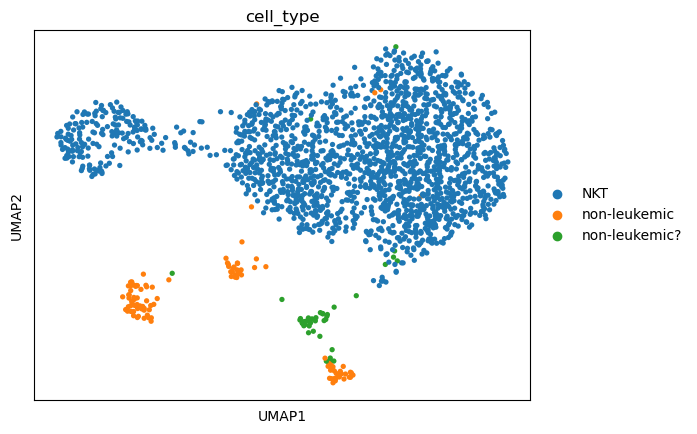

EG47


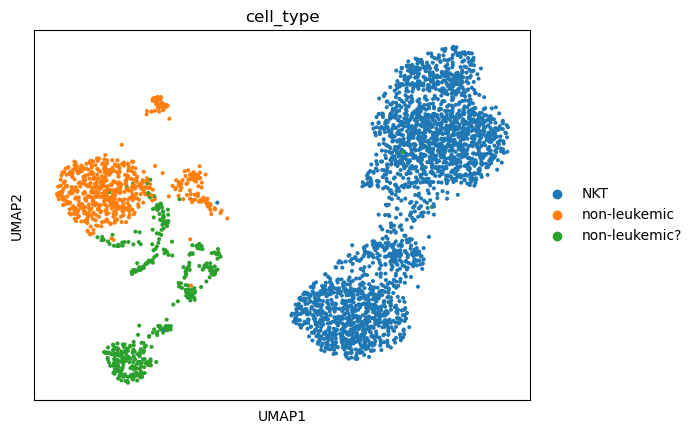

In [8]:
#latent space

print("EG46")
sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')

print("EG47")
sc.pl.umap(adata1, color = ['cell_type'], color_map = 'viridis')

In [9]:
adata_merged = adata.concatenate(adata1, index_unique=None)

In [10]:
adata_merged.obs['cell_type']

AAACCTGCAGTTCATG-1-111              NKT
AAACCTGGTGCACGAA-1-111              NKT
AAACGGGAGGCCGAAT-1-111    non-leukemic?
AAACGGGAGGCTACGA-1-111              NKT
AAACGGGAGTCAAGGC-1-111              NKT
                              ...      
TTTGTCAAGAGGGATA-1-145     non-leukemic
TTTGTCAAGCGTGAGT-1-145    non-leukemic?
TTTGTCACACCGGAAA-1-145              NKT
TTTGTCACATGCATGT-1-145              NKT
TTTGTCATCAAAGTAG-1-145              NKT
Name: cell_type, Length: 5587, dtype: category
Categories (3, object): ['NKT', 'non-leukemic', 'non-leukemic?']

In [11]:
#surface protein expression, DSB selected
prot=adata_merged.obsm['protein_expression_dsb']

In [12]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CD38': 'CD38_prot', 'CD34': 'CD34_prot', 'CD44': 'CD44_prot'})

In [13]:
#adding protein information to obs

a = adata_merged.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata_merged.obs=adata1

In [14]:
adata_merged

AnnData object with n_obs × n_vars = 5587 × 12032
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_express

In [16]:
#save the file!

adata_merged.write('/Users/tiinatuononen/Desktop/Thesis/Project/data/MDS_norm.h5ad')

In [17]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged, use_rep="X_totalVI")    

sc.tl.umap(adata_merged)

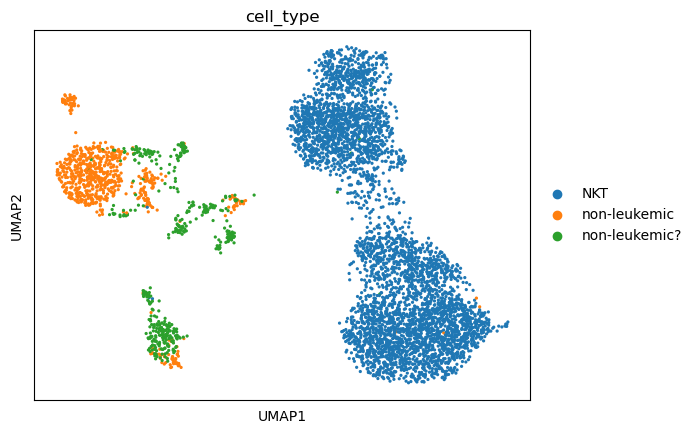

In [18]:
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

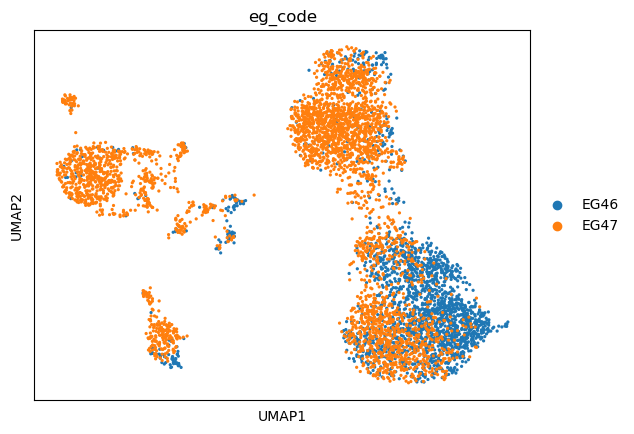

In [19]:
sc.pl.umap(adata_merged, color = ['eg_code'], color_map = 'viridis')

In [35]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

In [20]:
sc.tl.leiden(adata_merged, resolution = 0.5, key_added = "leiden_0.5")

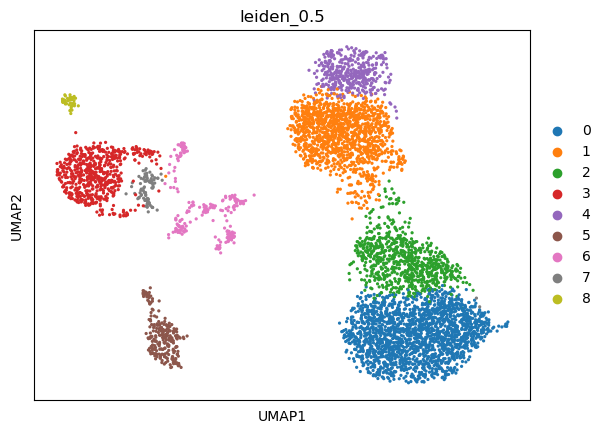

In [21]:
sc.pl.umap(adata_merged, color=['leiden_0.5'], ncols =3)

In [22]:
#Markers received from HRUH, KLRC1 = NKG2A

nk_genes = ["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY","GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1","PLAC8", "MBP"]

nk_genes2 = ["NKG2A","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]

In [23]:
#Used to check which genes were measured

listOfmarkers= nk_genes
markers = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers.append(x)
        



FGFBP2
FCGR3A
S1PR5
KLRC1
KLRC3
KLRD1
GNLY
GZMB
CX3CR1
GPR56
PRF1
KLRB1
SPON2
NKG7
TTC38
FCRL6
LILRB1
PLAC8
MBP


In [24]:
#Used to check which genes were measured

listOfmarkers= nk_genes2
markers2 = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers2.append(x)




NCAM1
GZMK
GZMA
KLRB1
GZMH
LAG3
B2M
HLA-DRA
OAS3
MX1
IRF7
MX2
IRF9
OAS1
OAS2
EIF2AK2
TNFRSF18
TNFRSF9
TNFRSF4
CRTAM
HAVCR2
TIGIT
TNFSF10
BCL2L11
CCL3
CCL4
TNF
IFNG
CD69


In [25]:
nk_markers = [markers, markers2]

nk_markers = list(np.concatenate(nk_markers).flat)

nk_markers

['FGFBP2',
 'FCGR3A',
 'S1PR5',
 'KLRC1',
 'KLRC3',
 'KLRD1',
 'GNLY',
 'GZMB',
 'CX3CR1',
 'GPR56',
 'PRF1',
 'KLRB1',
 'SPON2',
 'NKG7',
 'TTC38',
 'FCRL6',
 'LILRB1',
 'PLAC8',
 'MBP',
 'NCAM1',
 'GZMK',
 'GZMA',
 'KLRB1',
 'GZMH',
 'LAG3',
 'B2M',
 'HLA-DRA',
 'OAS3',
 'MX1',
 'IRF7',
 'MX2',
 'IRF9',
 'OAS1',
 'OAS2',
 'EIF2AK2',
 'TNFRSF18',
 'TNFRSF9',
 'TNFRSF4',
 'CRTAM',
 'HAVCR2',
 'TIGIT',
 'TNFSF10',
 'BCL2L11',
 'CCL3',
 'CCL4',
 'TNF',
 'IFNG',
 'CD69']

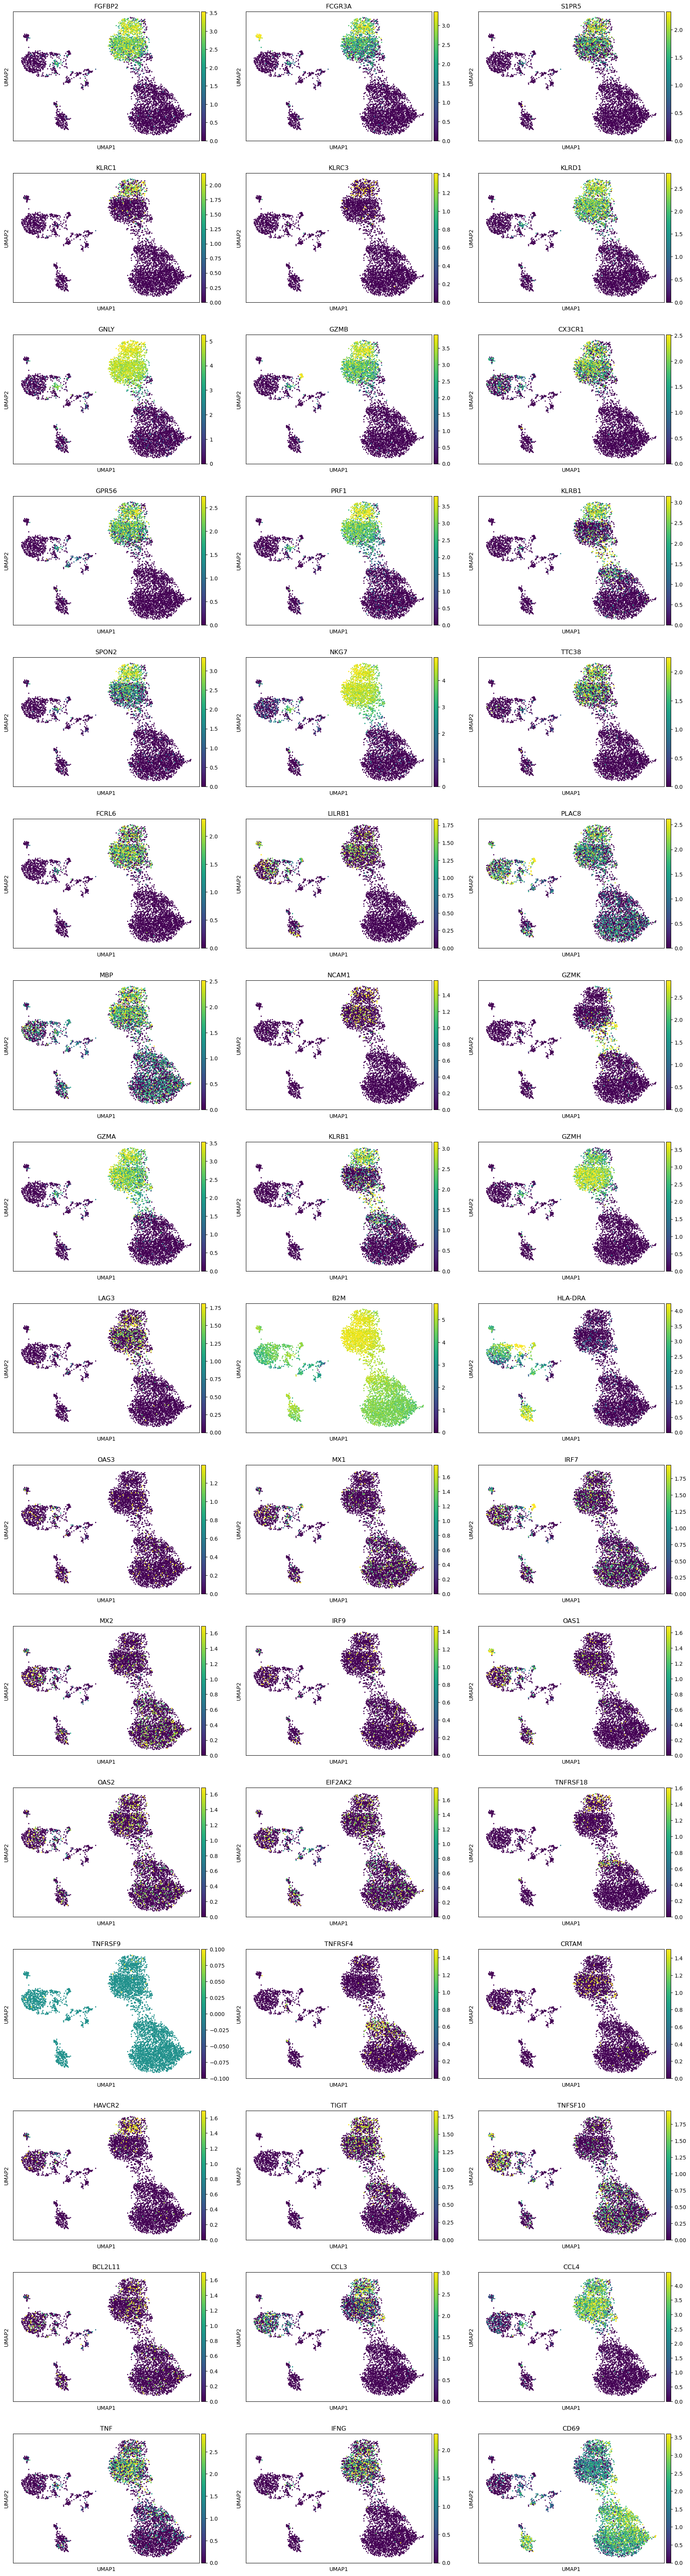

In [26]:
sc.pl.umap(adata_merged, color=nk_markers, ncols =3, vmax="p99")

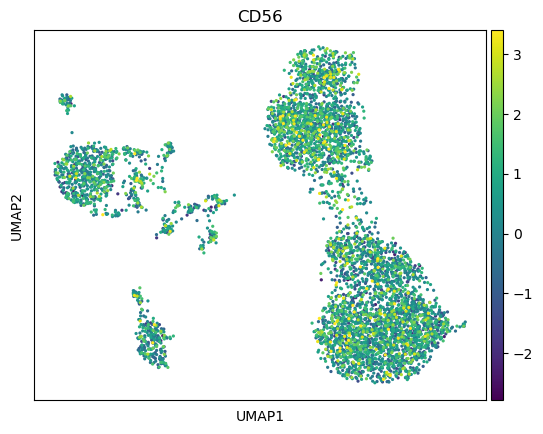

In [27]:
nk_prot = ['CD56']

sc.pl.umap(adata_merged, color=nk_prot, ncols =3, vmax="p99")

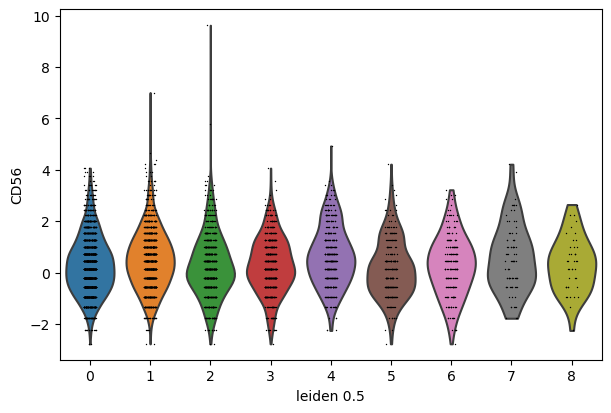

In [28]:
sc.pl.violin(adata_merged, ['CD56'], groupby='leiden_0.5')

## Clustering by protein expression

In [29]:
adata_merged_prot = adata_merged.copy()

In [30]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged_prot, use_rep="protein_expression_dsb")    

sc.tl.umap(adata_merged_prot)

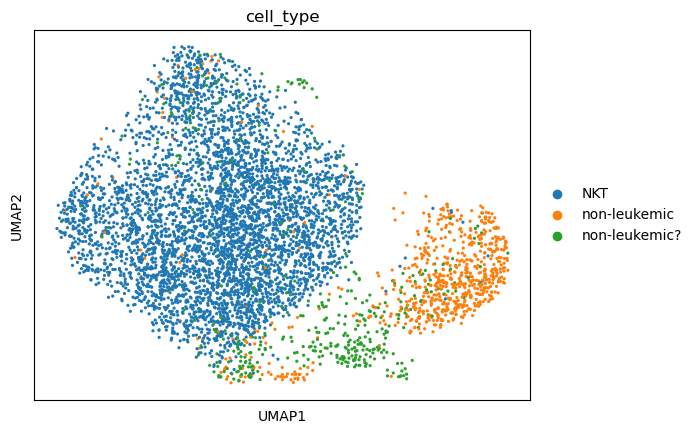

In [31]:

sc.pl.umap(adata_merged_prot, color = ['cell_type'], color_map = 'viridis')

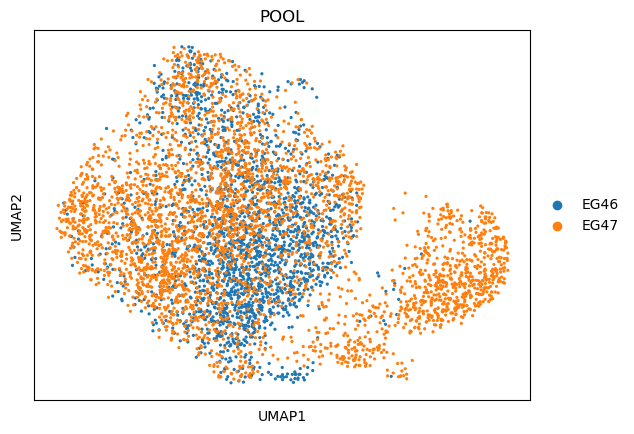

In [32]:
sc.pl.umap(adata_merged_prot, color = ['POOL'], color_map = 'viridis')

## Clustering by RNA

In [33]:
adata_merged_rna = adata_merged.copy()

In [34]:
sc.pp.pca(adata_merged_rna)

In [35]:
#calculating neighbors

sc.pp.neighbors(adata_merged_rna)

sc.tl.umap(adata_merged_rna)

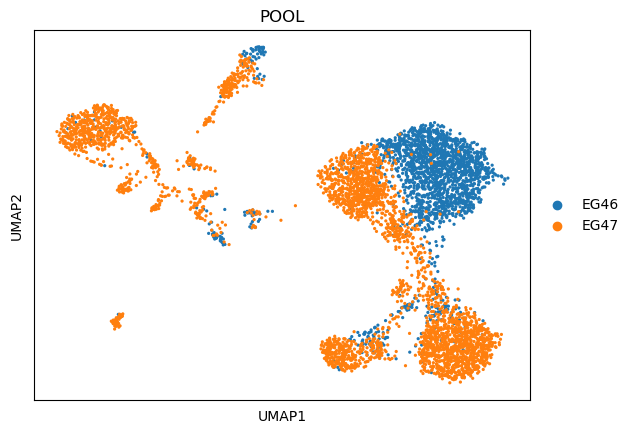

In [36]:
sc.pl.umap(adata_merged_rna, color = ['POOL'], color_map = 'viridis')

## Summary

Latent


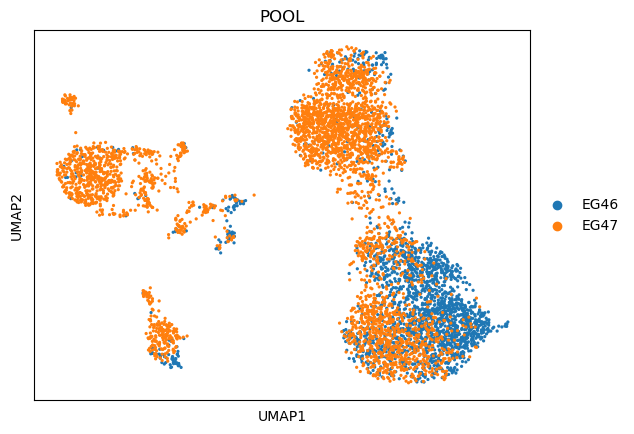

Protein


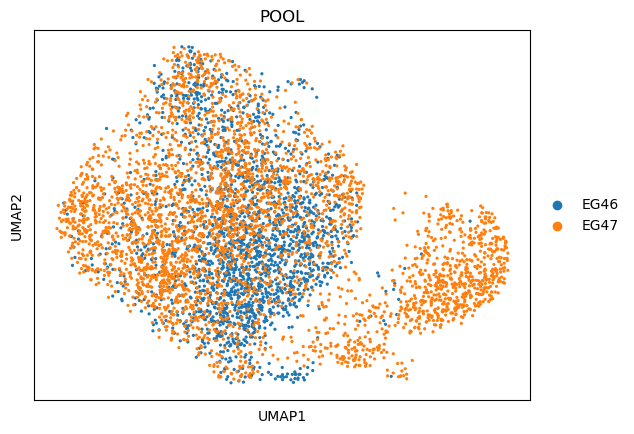

RNA


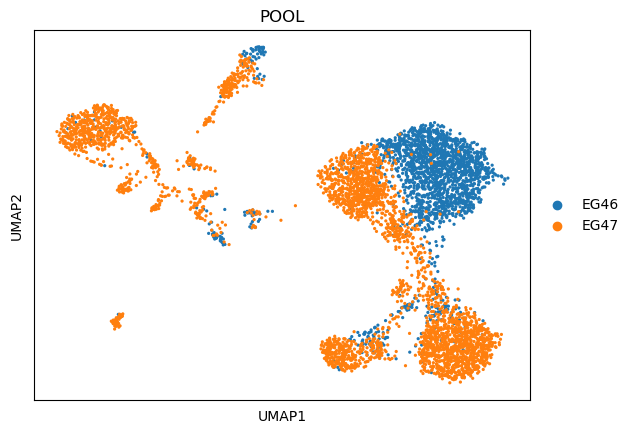

In [37]:
print("Latent")
sc.pl.umap(adata_merged, color = ['POOL'], color_map = 'viridis')

print("Protein")
sc.pl.umap(adata_merged_prot, color = ['POOL'], color_map = 'viridis')

print("RNA")
sc.pl.umap(adata_merged_rna, color = ['POOL'], color_map = 'viridis')

Latent


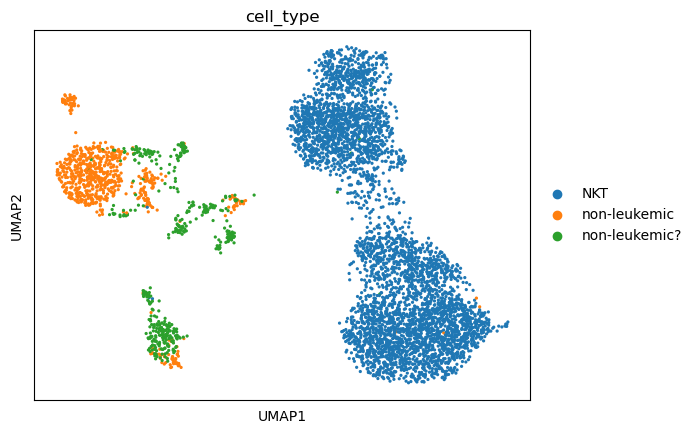

Protein


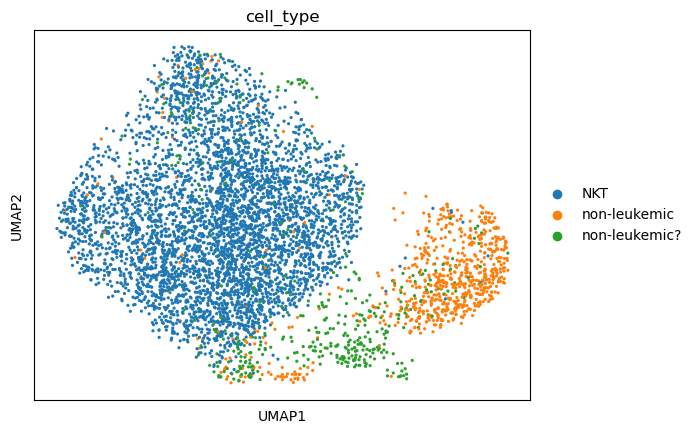

RNA


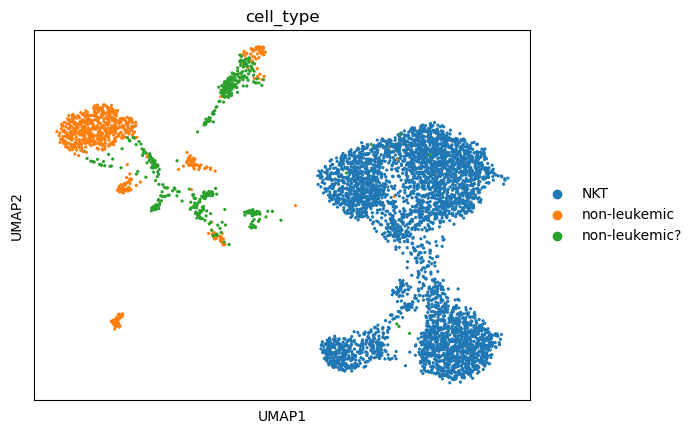

In [38]:
print("Latent")
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

print("Protein")
sc.pl.umap(adata_merged_prot, color = ['cell_type'], color_map = 'viridis')

print("RNA")
sc.pl.umap(adata_merged_rna, color = ['cell_type'], color_map = 'viridis')

In [ ]:
---- STOP HERE --------

In [53]:
adata_merged

AnnData object with n_obs × n_vars = 3281 × 11607
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1', 'leiden_2', 'leiden_0.5', 'leiden_0.3'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'neighbors', 'umap'

In [54]:
#selecting NK cell cluster
adata_nk = adata_merged[adata_merged.obs['leiden_1'] == "?"]

In [55]:
adata_nk

View of AnnData object with n_obs × n_vars = 0 × 11607
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1', 'leiden_2', 'leiden_0.5', 'leiden_0.3'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'neighbors', '

In [56]:
#calculating neigbors for object containing only NK cells

sc.pp.neighbors(adata_nk, use_rep="X_totalVI")

sc.tl.umap(adata_nk)

ValueError: Found array with 0 sample(s) (shape=(0, 50)) while a minimum of 1 is required by check_pairwise_arrays.

In [ ]:
sc.pl.umap(adata_nk, color = ["eg_code"])

In [ ]:
#Calculating leidens for latent object
sc.tl.leiden(adata_nk, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata_nk, resolution = 0.7, key_added = "leiden_0.7")
sc.tl.leiden(adata_nk, resolution = 0.8, key_added = "leiden_0.8")


In [ ]:
sc.pl.umap(adata_nk, color=['leiden_0.6', 'leiden_0.7', 'leiden_0.8'], ncols =3)

In [ ]:
sc.pl.umap(adata_nk, color=['leiden_0.7'], ncols =3)

sc.tl.rank_genes_groups(adata_nk, 'leiden_0.7', method='wilcoxon')
sc.pl.rank_genes_groups(adata_nk, n_genes=25, sharey=False, ncols=2)

- Here cluster 3 probably contains cells mostly from EG48 sample.

In [ ]:
#Removing mitochondrial and ribosomal genes

#genes to be removed
mito_genes = adata_nk.var_names.str.startswith('MT-')
ribo_genes = adata_nk.var_names.str.startswith('RPL')
ribo_genes1 = adata_nk.var_names.str.startswith('RPS')

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, ribo_genes1)

#other genes kept
keep = np.invert(remove)

adata_nk = adata_nk[:,keep]

#print(adata_gex.n_obs, adata_gex.n_vars)

In [ ]:
sc.pl.umap(adata_nk, color=['leiden_0.7'], ncols =3)

sc.tl.rank_genes_groups(adata_nk, 'leiden_0.7', method='wilcoxon')
sc.pl.rank_genes_groups(adata_nk, n_genes=25, sharey=False, ncols=2)

In [ ]:
#CD56bright markers

sc.pl.violin(adata_nk, ['IL7R', 'SELL'], groupby='leiden_0.7')

sc.pl.violin(adata_nk, ['CD56', 'CD44'], groupby='leiden_0.7')

In [ ]:
#CD56bright NK cells
#SELL = CD62L, NCAM1 = CD56, IL7R = CD127

cd56bright_mels = ['NCAM1', 'KIT', 'SELL', 'CD2', 'IL7R'] #KLRC1 not found
cd56bright_mels_prot= ['CD56', "CD2_prot", 'CD127'] #CD62L not measured

print("RNA markers")
sc.pl.umap(adata_nk, color=cd56bright_mels, ncols = 3, vmax="p99")

print("Protein markers")

sc.pl.umap(adata_nk, color=cd56bright_mels_prot, ncols = 3, vmax="p99")

In [ ]:
#Mature NK cells

cd56dim_1_high= ['S100A4', 'S100A6', 'ACTB', 'ACTG1', 'CORO1A', 'PFN1']
# cd56dim_1_low = ['GZMK'] not measured

sc.pl.umap(adata_nk, color=cd56dim_1_high, ncols = 3, vmax="p99")
#sc.pl.umap(adata_nk, color=cd56dim_1_low, ncols = 3, vmax="p99")



In [ ]:
#proliferating NK

prolif_high = ['S100A4', 'S100A6', 'IL32', 'GZMH', 'GNLY'] #KLRC2 not found
prolif_low = ['KLRB1'] #KLRC1 not found

sc.pl.umap(adata_nk, color=prolif_high, ncols = 3, vmax="p99")
sc.pl.umap(adata_nk, color=prolif_low, ncols = 3, vmax="p99")

In [ ]:
#Tissue-resident NK

tr_mels= ['CCL3', 'CCL4', 'CD160', 'DUSP2', 'CXCR4', 'BTG1'] #XCL1, GZMK not found

sc.pl.umap(adata_nk, color=tr_mels, ncols = 3, vmax="p99")